# Assignment 2: Linear Regression
## Hannah Mencer

## Predictors: number of convenience stores, distance to nearest mrt, and house age
## Response: house price of unit area

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df=pd.read_csv('real_estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.shape

(414, 8)

In [4]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [5]:
df.sample(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
163,164,2013.500,8.5,104.81010,5,24.96674,121.54067,55.5
326,327,2013.500,4.1,56.47425,7,24.95744,121.53711,62.1
44,45,2013.583,2.7,533.47620,4,24.97445,121.54765,53.9
218,219,2013.417,13.6,492.23130,5,24.96515,121.53737,43.8
282,283,2012.917,2.0,1455.79800,1,24.95120,121.54900,25.6
48,49,2013.417,24.2,4605.74900,0,24.94684,121.49578,13.4
348,349,2012.833,4.6,259.66070,6,24.97585,121.54516,53.7
198,199,2013.083,34.0,157.60520,7,24.96628,121.54196,39.1
255,256,2013.417,31.5,5512.03800,1,24.95095,121.48458,17.4
283,284,2013.417,33.5,1978.67100,2,24.98674,121.51844,23.5


In [6]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

There are no missing values, so we do not need to do anything to fill them.

# Outliers

<AxesSubplot:xlabel='X2 house age'>

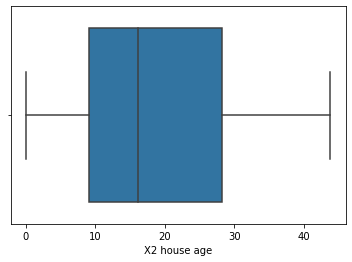

In [7]:
sns.boxplot(x='X2 house age',data=df)

There are no outliers, so we do not need to do anything.

<AxesSubplot:xlabel='X3 distance to the nearest MRT station'>

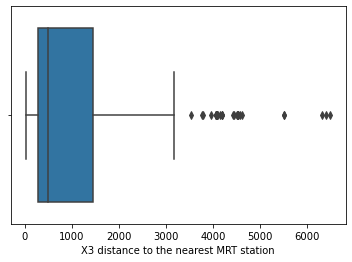

In [8]:
sns.boxplot(x='X3 distance to the nearest MRT station',data=df)

In [9]:
df.sort_values('X3 distance to the nearest MRT station',ascending=False).head(50)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
347,348,2013.583,17.4,6488.021,1,24.95719,121.47353,11.2
116,117,2013.000,30.9,6396.283,1,24.94375,121.47883,12.2
249,250,2012.833,18.0,6306.153,1,24.95743,121.47516,15.0
255,256,2013.417,31.5,5512.038,1,24.95095,121.48458,17.4
8,9,2013.500,31.7,5512.038,1,24.95095,121.48458,18.8
48,49,2013.417,24.2,4605.749,0,24.94684,121.49578,13.4
176,177,2012.833,13.9,4573.779,0,24.94867,121.49507,19.2
170,171,2013.333,24.0,4527.687,0,24.94741,121.49628,14.4
30,31,2013.500,25.9,4519.690,0,24.94826,121.49587,22.1
331,332,2013.333,25.6,4519.690,0,24.94826,121.49587,15.6


<AxesSubplot:ylabel='Density'>

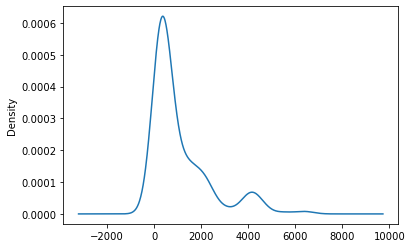

In [10]:
df['X3 distance to the nearest MRT station'].plot.density()

There are many outliers on the max side, and they are part of a right skew distribution. If we look up on Google maps the coordinates corresponding to the max value on X3 as well as the coordinates corresponding to at value that is not an outlier, we see that both locations are in the same area in Taiwan, so the distances do not seem to be entered incorrectly. They also don't have a substantially large gap from the rest of the values. Therefore, we should not drop any of the values.

<AxesSubplot:xlabel='X4 number of convenience stores'>

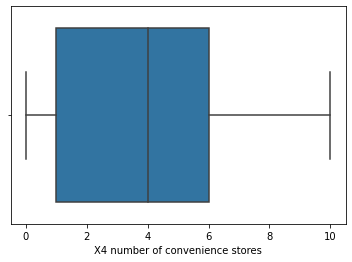

In [11]:
sns.boxplot(x='X4 number of convenience stores',data=df)

There are no outliers, so we do not need to do anything.

<AxesSubplot:xlabel='Y house price of unit area'>

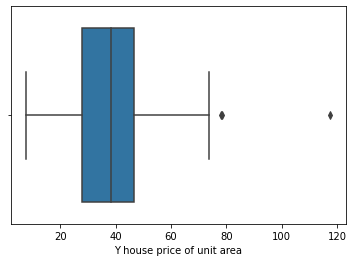

In [12]:
sns.boxplot(x='Y house price of unit area',data=df)

In [13]:
df.sort_values('Y house price of unit area',ascending=False).head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
270,271,2013.333,10.8,252.5822,1,24.97460,121.53046,117.5
220,221,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
312,313,2013.583,35.4,318.5292,9,24.97071,121.54069,78.0
166,167,2013.417,0.0,292.9978,6,24.97744,121.54458,73.6
105,106,2012.833,0.0,292.9978,6,24.97744,121.54458,71.0


The values are reasonable and likely not entered incorrectly as one house could be considerably more valubale than others. Also, 117.5 thousand is not too high of a price for it to be considered an error, and therefore, we will not be getting rid of any of the outliers.

# Scale and Transform

In [14]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


<AxesSubplot:ylabel='Density'>

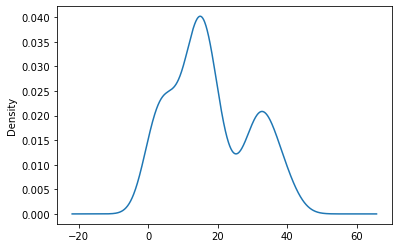

In [15]:
df['X2 house age'].plot.density()

There are no large values that would dominate the data, and the distribution is fairly normal. Therefore, we do not need to scale or transform this column.

<AxesSubplot:ylabel='Density'>

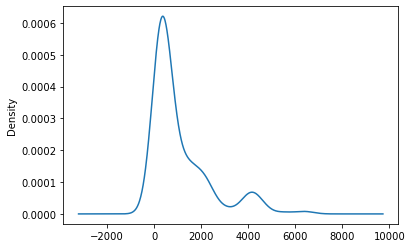

In [16]:
df['X3 distance to the nearest MRT station'].plot.density()

There is a right skew as well as large values that could dominate the data, so we need to scale and transform this column.

<AxesSubplot:>

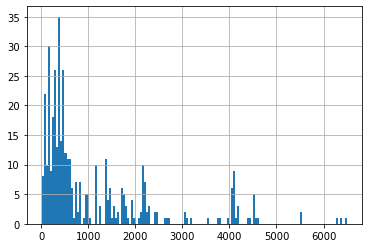

In [17]:
df['X3 distance to the nearest MRT station'].hist(bins=150)

<AxesSubplot:>

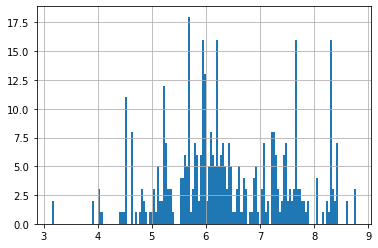

In [18]:
from sklearn import preprocessing as prep
import numpy as np

df['X3_distance_transformed'] = df['X3 distance to the nearest MRT station'].apply(np.log)
df['X3_distance_transformed'].hist(bins=150)

<AxesSubplot:>

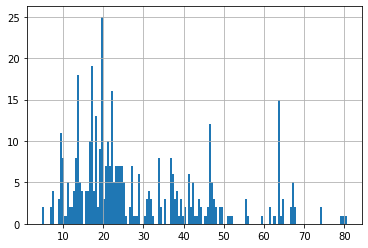

In [19]:
df['X3_distance_transformed_sqrt'] = df['X3 distance to the nearest MRT station'].apply(np.sqrt)
df['X3_distance_transformed_sqrt'].hist(bins=150)

<AxesSubplot:>

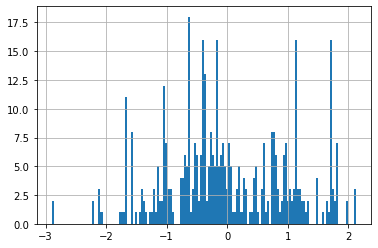

In [20]:
df['X3_distance_transformed_scaled'] = prep.scale(df['X3_distance_transformed'])
df['X3_distance_transformed_scaled'].hist(bins=150)

The log transformation produces the most normal distribution, so that's the one we will use.

<AxesSubplot:ylabel='Density'>

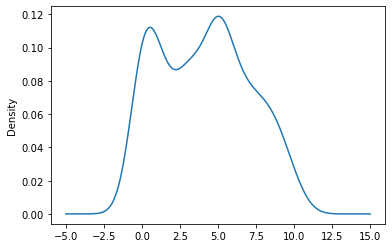

In [21]:
df['X4 number of convenience stores'].plot.density()

There are no large values to dominate the data, and the distribution is fairly normal. Therefore, we do not need to scale or transform the data.

<AxesSubplot:ylabel='Density'>

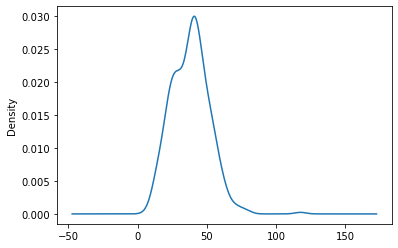

In [22]:
df['Y house price of unit area'].plot.density()

The distribution is fairly normal, and there are no large values to dominate the data. Therefore, we do not need to scale or transform this data.

# Dummy Variables

There are no discrete variables, so we do not need to transform anything into dummy variables.

# Defining Features

In [23]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X3_distance_transformed,X3_distance_transformed_sqrt,X3_distance_transformed_scaled
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,4.441225,9.212970,-1.744066
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,5.725527,17.509846,-0.595682
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,6.331474,23.706212,-0.053862
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,6.331474,23.706212,-0.053862
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,5.967603,19.762803,-0.379225


In [24]:
X=df[['X2 house age','X3_distance_transformed_scaled','X4 number of convenience stores']]
Y=df[['Y house price of unit area']]

# Split Data

In [25]:
# Now we can split our data into a training and test set.  In this example, we are using an 80/20 split, 
# where 80% of our data will be used for training our model, and 20% of our data will be used for testing.

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# Train Model

In [26]:
# Now we train our LinearRegression model using the training subset of data.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluate the Model

In [59]:
#r2
r = model.score(X_test, y_test)

#adjusted r2
adj_r=1-(1-r)*(len(df)-1)/(len(df)-X.shape[1]-1)

#RMSE
y_predict = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_predict, y_test))

print("R-square: ", r)
print("Adjusted R-square ",adj_r)
print("RMSE: ", rmse)

R-square:  0.6752865770173868
Adjusted R-square  0.6729106251419044
RMSE:  7.020467852805154


## What it means

R squared means model explains 67.53% of the variance. The Adjusted R-square means that the model explains 67.29% of the variance while accounting for the 3 predictors in the model. The RMSE means that on average the actual housing price is 7.02 standard deviations removed from the predicted housing price.

# Trying other parameters

In [27]:
def lin_reg(X,Y):
    # Now we can split our data into a training and test set.  In this example, we are using an 80/20 split, 
    # where 80% of our data will be used for training our model, and 20% of our data will be used for testing.

    # Split X and y into X_
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
   
    # Now we train our LinearRegression model using the training subset of data.
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    #evaluating the model
    
    #r2
    r = model.score(X_test, y_test)

    #adjusted r2
    adj_r=1-(1-r)*(len(df)-1)/(len(df)-X.shape[1]-1)

    #RMSE
    y_predict = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_predict, y_test))

    print("R-square: ", r)
    print("Adjusted R-square ",adj_r)
    print("RMSE: ", rmse)

In [28]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X3_distance_transformed,X3_distance_transformed_sqrt,X3_distance_transformed_scaled
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,4.441225,9.212970,-1.744066
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,5.725527,17.509846,-0.595682
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,6.331474,23.706212,-0.053862
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,6.331474,23.706212,-0.053862
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,5.967603,19.762803,-0.379225
...,...,...,...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,8.314346,63.890649,1.719160
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,4.504864,9.510839,-1.687161
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,5.968630,19.772951,-0.378307
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,4.652150,10.237680,-1.555462


In [29]:
# Model 1
X=df[['X2 house age','X4 number of convenience stores']]
Y=df[['Y house price of unit area']]

lin_reg(X,Y)

R-square:  0.44916401473147294
Adjusted R-square  0.4464835476498743
RMSE:  9.143807747589593


this is generally worse than the first (less predictors)

In [30]:
# Model 2

In [35]:
X=df[['X3 distance to the nearest MRT station','X4 number of convenience stores']]
Y=df[['Y house price of unit area']]

lin_reg(X,Y)

R-square:  0.5931902071032947
Adjusted R-square  0.5912105974055005
RMSE:  7.857992926802703


In [65]:
# Model 3

In [43]:
# Polynomial regression
X = df[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores']]
y = df[['Y house price of unit area']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

for i in range(2, 4):
    polynomial_features= PolynomialFeatures(degree=i)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.fit_transform(X_test)
    print("Polynomial Degree: ", i)
    plm = LinearRegression()
    plm.fit(X_train_poly, y_train)
    y_poly_pred = plm.predict(X_test_poly)
    
    r2 = r2_score(y_test,y_poly_pred)
    print("R-Squared: ", r2)
    
    #adjusted r2
    adj_r=1-(1-r2)*(len(df)-1)/(len(df)-X.shape[1]-1)
    print("Adjusted R-Squared: ", adj_r)
    
    regression_model_mse = mean_squared_error(y_poly_pred, y_test)
    rmse = np.sqrt(regression_model_mse)
    print("RMSE: ", rmse,'\n')

Polynomial Degree:  2
R-Squared:  0.7135363528730221
Adjusted R-Squared:  0.7114402774062394
RMSE:  6.594026566681873 

Polynomial Degree:  3
R-Squared:  0.6220063666450987
Adjusted R-Squared:  0.61924055957177
RMSE:  7.574573368482154 



# Best Model

Of the three new models, the third one is the best. However, it is not a 'good' model. The R-square and Ajusted R-square are over .5 which is okay, but they are both around .6 which isn't great. Higher R-square values indicate better fitting models. The RMSE is fairly high at 7.57. Lower RMSE scores are indicaters of a better model, so the fact that the RMSE for this model is higher, means that the model isn't great. The not too high R-square values coupled with the high RMSE value tells us that even though this is the 'best' of the three models, it is still not a great model for predicting housing prices.